- 미니배치 크기, 에폭 수, 옵티마이저, 은닉층 수 등의 하이퍼파라미터들을 변경시켜가며 다양한 모델을 통해 분류 모델을 학습시켜봤지만, 값을 변경시켜도 validation accuracy가 0.75~0.77 사이의 값으로 나오는 것을 확인하였습니다.
- 0.75와 0.77 사이에서는 대체적으로 은닉층 수를 높이거나 에폭 수를 높이면 0.77에 근접한 값이 나왔습니다.
- 아마도 고혈압 환자군과 대조군에 대해 생활 패턴에 차이가 있기는 하나, 차이가 확연하게 나지는 않아 이런 현상이 나타나는 것으로 예측됩니다.
- 앞으론 '이진 분류문제에서의 딥러닝 알고리즘의 활용 가능성 평가' 논문의 내용을 바탕으로 모델을 구성하고 성능을 평가한 후에 가장 뛰어난 모델을 선정하려 합니다.

# 5/5

DNN 모델 성능 비교

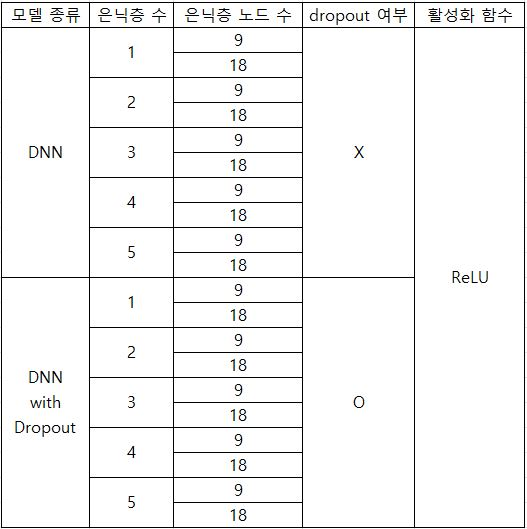

- 논문에서 은닉층의 노드 수는 입력 변수 개수와 같게 설정하거나 또는 그 2배로 설정했으므로 여기서도 입력 변수 개수(9)와 그 2배(18)개의 노드를 은닉층의 노드 수로 채택합니다.
- 그리고 은닉층의 수를 1에서 5 사이로 선정함으로서 은닉층의 수가 성능에 어떤 영향을 끼치는지 확인하고자 합니다.
- 출력 함수는 sigmoid, 손실 함수는 binary_crossentropy, 옵티마이저는 Adam, 학습률은 0.001, 미니 배치 크기는 128, 에폭은 50으로 고정하여 수행할 것입니다. dropout 함수의 경우에는 각 모형들의 층마다 사용하며, 0.5의 확률로 뉴런이 사라지도록 설정할 것입니다.
- 성능의 평가는 앞서서 많이 사용한 accuracy(정확도)를 사용할 것이며, 이를 통해 비교 분석을 수행할 것입니다.

1. DNN - 1 / 9 / X / ReLU

In [ ]:
mlp1 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp1.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp1.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7613

Epoch 1/50
363/363 [==============================] - 5s 5ms/step - loss: 0.6249 - accuracy: 0.6564 - val_loss: 0.5797 - val_accuracy: 0.6758
Epoch 2/50
363/363 [==============================] - 1s 4ms/step - loss: 0.5300 - accuracy: 0.7239 - val_loss: 0.4944 - val_accuracy: 0.7659
Epoch 3/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4740 - accuracy: 0.7644 - val_loss: 0.4762 - val_accuracy: 0.7709
Epoch 4/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4576 - accuracy: 0.7708 - val_loss: 0.4764 - val_accuracy: 0.7681
Epoch 5/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4514 - accuracy: 0.7744 - val_loss: 0.4784 - val_accuracy: 0.7675
Epoch 6/50
363/363 [==============================] - 2s 4ms/step - loss: 0.4475 - accuracy: 0.7768 - val_loss: 0.4791 - val_accuracy: 0.7661
Epoch 7/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4455 - accuracy: 0.7762 - val_loss: 0.4844 - val_accuracy: 0.7636
Epoch 

2. DNN - 1 / 18 / X / ReLU

In [ ]:
mlp2 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp2.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp2.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7642

Epoch 1/50
363/363 [==============================] - 2s 4ms/step - loss: 0.5847 - accuracy: 0.6823 - val_loss: 0.5250 - val_accuracy: 0.7544
Epoch 2/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4850 - accuracy: 0.7541 - val_loss: 0.4778 - val_accuracy: 0.7651
Epoch 3/50
363/363 [==============================] - 2s 5ms/step - loss: 0.4560 - accuracy: 0.7706 - val_loss: 0.4711 - val_accuracy: 0.7644
Epoch 4/50
363/363 [==============================] - 2s 5ms/step - loss: 0.4475 - accuracy: 0.7753 - val_loss: 0.4720 - val_accuracy: 0.7635
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4434 - accuracy: 0.7772 - val_loss: 0.4841 - val_accuracy: 0.7549
Epoch 6/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4407 - accuracy: 0.7800 - val_loss: 0.4661 - val_accuracy: 0.7635
Epoch 7/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4387 - accuracy: 0.7803 - val_loss: 0.4652 - val_accuracy: 0.7639
Epoch 

3. DNN - 2 / 9 / X / ReLU

In [ ]:
mlp3 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp3.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp3.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp3.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7650

Epoch 1/50
363/363 [==============================] - 6s 9ms/step - loss: 0.6009 - accuracy: 0.6707 - val_loss: 0.5257 - val_accuracy: 0.7487
Epoch 2/50
363/363 [==============================] - 3s 8ms/step - loss: 0.4743 - accuracy: 0.7593 - val_loss: 0.5076 - val_accuracy: 0.7375
Epoch 3/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4500 - accuracy: 0.7732 - val_loss: 0.4795 - val_accuracy: 0.7520
Epoch 4/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4430 - accuracy: 0.7765 - val_loss: 0.4744 - val_accuracy: 0.7520
Epoch 5/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4391 - accuracy: 0.7783 - val_loss: 0.4838 - val_accuracy: 0.7448
Epoch 6/50
363/363 [==============================] - 3s 8ms/step - loss: 0.4372 - accuracy: 0.7795 - val_loss: 0.4685 - val_accuracy: 0.7530
Epoch 7/50
363/363 [==============================] - 3s 8ms/step - loss: 0.4362 - accuracy: 0.7805 - val_loss: 0.4660 - val_accuracy: 0.7541
Epoch 

4. DNN - 2 / 18 / X / ReLU

In [ ]:
mlp4 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp4.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp4.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp4.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7593

Epoch 1/50
363/363 [==============================] - 3s 5ms/step - loss: 0.5459 - accuracy: 0.7075 - val_loss: 0.4839 - val_accuracy: 0.7550
Epoch 2/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4503 - accuracy: 0.7755 - val_loss: 0.4645 - val_accuracy: 0.7644
Epoch 3/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4413 - accuracy: 0.7788 - val_loss: 0.4800 - val_accuracy: 0.7468
Epoch 4/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4386 - accuracy: 0.7803 - val_loss: 0.4772 - val_accuracy: 0.7466
Epoch 5/50
363/363 [==============================] - 2s 5ms/step - loss: 0.4363 - accuracy: 0.7804 - val_loss: 0.4682 - val_accuracy: 0.7534
Epoch 6/50
363/363 [==============================] - 2s 4ms/step - loss: 0.4346 - accuracy: 0.7815 - val_loss: 0.4684 - val_accuracy: 0.7529
Epoch 7/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4342 - accuracy: 0.7816 - val_loss: 0.4605 - val_accuracy: 0.7593
Epoch 

5. DNN - 3 / 9 / X / ReLU

In [ ]:
mlp5 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp5.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp5.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp5.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7595

Epoch 1/50
363/363 [==============================] - 4s 7ms/step - loss: 0.5835 - accuracy: 0.6871 - val_loss: 0.5123 - val_accuracy: 0.7347
Epoch 2/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4653 - accuracy: 0.7623 - val_loss: 0.4930 - val_accuracy: 0.7353
Epoch 3/50
363/363 [==============================] - 2s 5ms/step - loss: 0.4480 - accuracy: 0.7725 - val_loss: 0.5254 - val_accuracy: 0.7116
Epoch 4/50
363/363 [==============================] - 2s 5ms/step - loss: 0.4419 - accuracy: 0.7771 - val_loss: 0.4829 - val_accuracy: 0.7438
Epoch 5/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4388 - accuracy: 0.7769 - val_loss: 0.5060 - val_accuracy: 0.7250
Epoch 6/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4380 - accuracy: 0.7783 - val_loss: 0.4775 - val_accuracy: 0.7464
Epoch 7/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4371 - accuracy: 0.7777 - val_loss: 0.4928 - val_accuracy: 0.7315
Epoch 

6. DNN - 3 / 18 / X / ReLU

In [ ]:
mlp6 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp6.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp6.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp6.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7684

Epoch 1/50
363/363 [==============================] - 6s 8ms/step - loss: 0.5245 - accuracy: 0.7214 - val_loss: 0.4688 - val_accuracy: 0.7538
Epoch 2/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4452 - accuracy: 0.7732 - val_loss: 0.4654 - val_accuracy: 0.7571
Epoch 3/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4377 - accuracy: 0.7788 - val_loss: 0.4595 - val_accuracy: 0.7619
Epoch 4/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4347 - accuracy: 0.7806 - val_loss: 0.4740 - val_accuracy: 0.7494
Epoch 5/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4339 - accuracy: 0.7815 - val_loss: 0.4639 - val_accuracy: 0.7580
Epoch 6/50
363/363 [==============================] - 2s 5ms/step - loss: 0.4333 - accuracy: 0.7825 - val_loss: 0.4557 - val_accuracy: 0.7630
Epoch 7/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4331 - accuracy: 0.7809 - val_loss: 0.4604 - val_accuracy: 0.7616
Epoch 

7. DNN - 4 / 9 / X / ReLU

In [ ]:
mlp7 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp7.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp7.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp7.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7650

Epoch 1/50
363/363 [==============================] - 6s 10ms/step - loss: 0.5474 - accuracy: 0.7092 - val_loss: 0.4615 - val_accuracy: 0.7665
Epoch 2/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4473 - accuracy: 0.7717 - val_loss: 0.4477 - val_accuracy: 0.7745
Epoch 3/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4396 - accuracy: 0.7764 - val_loss: 0.4636 - val_accuracy: 0.7615
Epoch 4/50
363/363 [==============================] - 2s 4ms/step - loss: 0.4379 - accuracy: 0.7790 - val_loss: 0.4504 - val_accuracy: 0.7706
Epoch 5/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4354 - accuracy: 0.7809 - val_loss: 0.4576 - val_accuracy: 0.7659
Epoch 6/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4352 - accuracy: 0.7803 - val_loss: 0.4444 - val_accuracy: 0.7740
Epoch 7/50
363/363 [==============================] - 2s 4ms/step - loss: 0.4354 - accuracy: 0.7803 - val_loss: 0.4524 - val_accuracy: 0.7675
Epoch

8. DNN - 4 / 18 / X / ReLU

In [ ]:
mlp8 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp8.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp8.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp8.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7639

Epoch 1/50
363/363 [==============================] - 5s 8ms/step - loss: 0.5043 - accuracy: 0.7374 - val_loss: 0.4770 - val_accuracy: 0.7486
Epoch 2/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4428 - accuracy: 0.7785 - val_loss: 0.4962 - val_accuracy: 0.7366
Epoch 3/50
363/363 [==============================] - 3s 7ms/step - loss: 0.4377 - accuracy: 0.7802 - val_loss: 0.5120 - val_accuracy: 0.7170
Epoch 4/50
363/363 [==============================] - 2s 5ms/step - loss: 0.4355 - accuracy: 0.7816 - val_loss: 0.4650 - val_accuracy: 0.7547
Epoch 5/50
363/363 [==============================] - 2s 4ms/step - loss: 0.4343 - accuracy: 0.7824 - val_loss: 0.4811 - val_accuracy: 0.7467
Epoch 6/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4336 - accuracy: 0.7808 - val_loss: 0.4841 - val_accuracy: 0.7388
Epoch 7/50
363/363 [==============================] - 2s 4ms/step - loss: 0.4327 - accuracy: 0.7821 - val_loss: 0.4618 - val_accuracy: 0.7572
Epoch 

9. DNN - 5 / 9 / X / ReLU

In [ ]:
mlp9 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp9.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp9.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp9.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7629

Epoch 1/50
363/363 [==============================] - 7s 9ms/step - loss: 0.5515 - accuracy: 0.7006 - val_loss: 0.4607 - val_accuracy: 0.7638
Epoch 2/50
363/363 [==============================] - 4s 11ms/step - loss: 0.4437 - accuracy: 0.7764 - val_loss: 0.4676 - val_accuracy: 0.7538
Epoch 3/50
363/363 [==============================] - 3s 7ms/step - loss: 0.4378 - accuracy: 0.7784 - val_loss: 0.4690 - val_accuracy: 0.7541
Epoch 4/50
363/363 [==============================] - 3s 7ms/step - loss: 0.4358 - accuracy: 0.7794 - val_loss: 0.4591 - val_accuracy: 0.7602
Epoch 5/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4348 - accuracy: 0.7794 - val_loss: 0.4504 - val_accuracy: 0.7652
Epoch 6/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4344 - accuracy: 0.7804 - val_loss: 0.4543 - val_accuracy: 0.7622
Epoch 7/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4340 - accuracy: 0.7790 - val_loss: 0.4771 - val_accuracy: 0.7461
Epoch

10. DNN - 5 / 18 / X / ReLU

In [ ]:
mlp10 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp10.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp10.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp10.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7687

Epoch 1/50
363/363 [==============================] - 5s 7ms/step - loss: 0.5266 - accuracy: 0.7195 - val_loss: 0.4631 - val_accuracy: 0.7608
Epoch 2/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4445 - accuracy: 0.7738 - val_loss: 0.4575 - val_accuracy: 0.7667
Epoch 3/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4398 - accuracy: 0.7762 - val_loss: 0.4429 - val_accuracy: 0.7759
Epoch 4/50
363/363 [==============================] - 2s 5ms/step - loss: 0.4378 - accuracy: 0.7796 - val_loss: 0.4512 - val_accuracy: 0.7700
Epoch 5/50
363/363 [==============================] - 2s 4ms/step - loss: 0.4365 - accuracy: 0.7803 - val_loss: 0.5013 - val_accuracy: 0.7303
Epoch 6/50
363/363 [==============================] - 2s 5ms/step - loss: 0.4357 - accuracy: 0.7812 - val_loss: 0.4507 - val_accuracy: 0.7719
Epoch 7/50
363/363 [==============================] - 2s 4ms/step - loss: 0.4347 - accuracy: 0.7810 - val_loss: 0.4748 - val_accuracy: 0.7515
Epoch 

11. DNN - 1 / 9 / O / ReLU

In [ ]:
mlp11 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp11.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp11.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp11.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7584

Epoch 1/50
363/363 [==============================] - 5s 8ms/step - loss: 0.6472 - accuracy: 0.6571 - val_loss: 0.6097 - val_accuracy: 0.6634
Epoch 2/50
363/363 [==============================] - 2s 6ms/step - loss: 0.5953 - accuracy: 0.6838 - val_loss: 0.5575 - val_accuracy: 0.7175
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5483 - accuracy: 0.7110 - val_loss: 0.5135 - val_accuracy: 0.7716
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5215 - accuracy: 0.7272 - val_loss: 0.4896 - val_accuracy: 0.7738
Epoch 5/50
363/363 [==============================] - 1s 4ms/step - loss: 0.5049 - accuracy: 0.7347 - val_loss: 0.4828 - val_accuracy: 0.7708
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4929 - accuracy: 0.7420 - val_loss: 0.4747 - val_accuracy: 0.7660
Epoch 7/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4893 - accuracy: 0.7419 - val_loss: 0.4781 - val_accuracy: 0.7572
Epoch 

12. DNN - 1 / 18 / O / ReLU

In [ ]:
mlp12 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp12.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp12.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp12.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7581

Epoch 1/50
363/363 [==============================] - 4s 7ms/step - loss: 0.6235 - accuracy: 0.6577 - val_loss: 0.5756 - val_accuracy: 0.6846
Epoch 2/50
363/363 [==============================] - 3s 8ms/step - loss: 0.5649 - accuracy: 0.7010 - val_loss: 0.5249 - val_accuracy: 0.7555
Epoch 3/50
363/363 [==============================] - 3s 8ms/step - loss: 0.5212 - accuracy: 0.7270 - val_loss: 0.4905 - val_accuracy: 0.7707
Epoch 4/50
363/363 [==============================] - 3s 7ms/step - loss: 0.4976 - accuracy: 0.7424 - val_loss: 0.4735 - val_accuracy: 0.7742
Epoch 5/50
363/363 [==============================] - 3s 8ms/step - loss: 0.4870 - accuracy: 0.7509 - val_loss: 0.4710 - val_accuracy: 0.7700
Epoch 6/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4792 - accuracy: 0.7538 - val_loss: 0.4703 - val_accuracy: 0.7661
Epoch 7/50
363/363 [==============================] - 2s 7ms/step - loss: 0.4762 - accuracy: 0.7569 - val_loss: 0.4666 - val_accuracy: 0.7675
Epoch 

13. DNN - 2 / 9 / O / ReLU

In [ ]:
mlp13 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp13.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp13.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp13.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7616

Epoch 1/50
363/363 [==============================] - 2s 4ms/step - loss: 0.6629 - accuracy: 0.6238 - val_loss: 0.6144 - val_accuracy: 0.6617
Epoch 2/50
363/363 [==============================] - 1s 4ms/step - loss: 0.6026 - accuracy: 0.6877 - val_loss: 0.5392 - val_accuracy: 0.6838
Epoch 3/50
363/363 [==============================] - 1s 4ms/step - loss: 0.5671 - accuracy: 0.7031 - val_loss: 0.5049 - val_accuracy: 0.7394
Epoch 4/50
363/363 [==============================] - 1s 4ms/step - loss: 0.5523 - accuracy: 0.7043 - val_loss: 0.4958 - val_accuracy: 0.7377
Epoch 5/50
363/363 [==============================] - 1s 4ms/step - loss: 0.5390 - accuracy: 0.7058 - val_loss: 0.4946 - val_accuracy: 0.7469
Epoch 6/50
363/363 [==============================] - 1s 4ms/step - loss: 0.5295 - accuracy: 0.7087 - val_loss: 0.4843 - val_accuracy: 0.7549
Epoch 7/50
363/363 [==============================] - 2s 6ms/step - loss: 0.5249 - accuracy: 0.7079 - val_loss: 0.4822 - val_accuracy: 0.7743
Epoch 

14. DNN - 2 / 18 / O / ReLU

In [ ]:
mlp14 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp14.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp14.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp14.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7614

Epoch 1/50
363/363 [==============================] - 4s 5ms/step - loss: 0.6232 - accuracy: 0.6414 - val_loss: 0.5364 - val_accuracy: 0.7044
Epoch 2/50
363/363 [==============================] - 2s 4ms/step - loss: 0.5348 - accuracy: 0.7042 - val_loss: 0.5012 - val_accuracy: 0.7492
Epoch 3/50
363/363 [==============================] - 1s 4ms/step - loss: 0.5055 - accuracy: 0.7352 - val_loss: 0.4777 - val_accuracy: 0.7618
Epoch 4/50
363/363 [==============================] - 2s 4ms/step - loss: 0.4905 - accuracy: 0.7438 - val_loss: 0.4750 - val_accuracy: 0.7444
Epoch 5/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4823 - accuracy: 0.7511 - val_loss: 0.4697 - val_accuracy: 0.7506
Epoch 6/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4785 - accuracy: 0.7529 - val_loss: 0.4786 - val_accuracy: 0.7316
Epoch 7/50
363/363 [==============================] - 2s 6ms/step - loss: 0.4727 - accuracy: 0.7587 - val_loss: 0.4641 - val_accuracy: 0.7538
Epoch 

15. DNN - 3 / 9 / O / ReLU

In [ ]:
mlp15 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp15.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp15.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp15.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7500

Epoch 1/50
363/363 [==============================] - 4s 7ms/step - loss: 0.6443 - accuracy: 0.6557 - val_loss: 0.6109 - val_accuracy: 0.6617
Epoch 2/50
363/363 [==============================] - 2s 7ms/step - loss: 0.6087 - accuracy: 0.6641 - val_loss: 0.5567 - val_accuracy: 0.6617
Epoch 3/50
363/363 [==============================] - 1s 4ms/step - loss: 0.5797 - accuracy: 0.6668 - val_loss: 0.5197 - val_accuracy: 0.6659
Epoch 4/50
363/363 [==============================] - 3s 7ms/step - loss: 0.5637 - accuracy: 0.6681 - val_loss: 0.5131 - val_accuracy: 0.6641
Epoch 5/50
363/363 [==============================] - 2s 6ms/step - loss: 0.5547 - accuracy: 0.6771 - val_loss: 0.5098 - val_accuracy: 0.6930
Epoch 6/50
363/363 [==============================] - 1s 4ms/step - loss: 0.5474 - accuracy: 0.6876 - val_loss: 0.4927 - val_accuracy: 0.7576
Epoch 7/50
363/363 [==============================] - 2s 5ms/step - loss: 0.5411 - accuracy: 0.6955 - val_loss: 0.4871 - val_accuracy: 0.7662
Epoch 

16. DNN - 3 / 18 / O / ReLU

In [ ]:
mlp16 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp16.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp16.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp16.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7704

Epoch 1/50
363/363 [==============================] - 4s 6ms/step - loss: 0.6284 - accuracy: 0.6563 - val_loss: 0.5501 - val_accuracy: 0.7013
Epoch 2/50
363/363 [==============================] - 1s 4ms/step - loss: 0.5469 - accuracy: 0.6956 - val_loss: 0.5041 - val_accuracy: 0.7422
Epoch 3/50
363/363 [==============================] - 2s 4ms/step - loss: 0.5098 - accuracy: 0.7226 - val_loss: 0.4836 - val_accuracy: 0.7481
Epoch 4/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4978 - accuracy: 0.7332 - val_loss: 0.4786 - val_accuracy: 0.7380
Epoch 5/50
363/363 [==============================] - 1s 4ms/step - loss: 0.4931 - accuracy: 0.7418 - val_loss: 0.4756 - val_accuracy: 0.7421
Epoch 6/50
363/363 [==============================] - 2s 5ms/step - loss: 0.4872 - accuracy: 0.7444 - val_loss: 0.4703 - val_accuracy: 0.7454
Epoch 7/50
363/363 [==============================] - 3s 9ms/step - loss: 0.4844 - accuracy: 0.7463 - val_loss: 0.4768 - val_accuracy: 0.7429
Epoch 

17. DNN - 4 / 9 / O / ReLU

In [ ]:
mlp17 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp17.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp17.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp17.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7770

Epoch 1/50
363/363 [==============================] - 4s 5ms/step - loss: 0.7134 - accuracy: 0.6181 - val_loss: 0.6405 - val_accuracy: 0.6617
Epoch 2/50
363/363 [==============================] - 2s 4ms/step - loss: 0.6414 - accuracy: 0.6636 - val_loss: 0.6326 - val_accuracy: 0.6617
Epoch 3/50
363/363 [==============================] - 2s 5ms/step - loss: 0.6306 - accuracy: 0.6699 - val_loss: 0.6158 - val_accuracy: 0.6617
Epoch 4/50
363/363 [==============================] - 2s 6ms/step - loss: 0.6184 - accuracy: 0.6746 - val_loss: 0.5963 - val_accuracy: 0.6617
Epoch 5/50
363/363 [==============================] - 2s 4ms/step - loss: 0.6002 - accuracy: 0.6791 - val_loss: 0.5633 - val_accuracy: 0.6626
Epoch 6/50
363/363 [==============================] - 2s 4ms/step - loss: 0.5849 - accuracy: 0.6889 - val_loss: 0.5363 - val_accuracy: 0.6916
Epoch 7/50
363/363 [==============================] - 2s 5ms/step - loss: 0.5763 - accuracy: 0.6959 - val_loss: 0.5274 - val_accuracy: 0.7038
Epoch 

18. DNN - 4 / 18 / O / ReLU

In [ ]:
mlp18 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp18.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp18.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp18.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7619

Epoch 1/50
363/363 [==============================] - 3s 5ms/step - loss: 0.6436 - accuracy: 0.6523 - val_loss: 0.5959 - val_accuracy: 0.6617
Epoch 2/50
363/363 [==============================] - 2s 4ms/step - loss: 0.5760 - accuracy: 0.6674 - val_loss: 0.5094 - val_accuracy: 0.7240
Epoch 3/50
363/363 [==============================] - 3s 7ms/step - loss: 0.5274 - accuracy: 0.6937 - val_loss: 0.4839 - val_accuracy: 0.7479
Epoch 4/50
363/363 [==============================] - 3s 9ms/step - loss: 0.5122 - accuracy: 0.7086 - val_loss: 0.4812 - val_accuracy: 0.7482
Epoch 5/50
363/363 [==============================] - 3s 8ms/step - loss: 0.5036 - accuracy: 0.7190 - val_loss: 0.4898 - val_accuracy: 0.7233
Epoch 6/50
363/363 [==============================] - 2s 7ms/step - loss: 0.4986 - accuracy: 0.7251 - val_loss: 0.4687 - val_accuracy: 0.7493
Epoch 7/50
363/363 [==============================] - 3s 7ms/step - loss: 0.4960 - accuracy: 0.7328 - val_loss: 0.4673 - val_accuracy: 0.7491
Epoch 

19. DNN - 5 / 9 / O / ReLU

In [ ]:
mlp19 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp19.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp19.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp19.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7721

Epoch 1/50
363/363 [==============================] - 4s 5ms/step - loss: 0.6599 - accuracy: 0.6542 - val_loss: 0.6397 - val_accuracy: 0.6617
Epoch 2/50
363/363 [==============================] - 2s 5ms/step - loss: 0.6213 - accuracy: 0.6612 - val_loss: 0.5873 - val_accuracy: 0.6617
Epoch 3/50
363/363 [==============================] - 2s 5ms/step - loss: 0.5937 - accuracy: 0.6615 - val_loss: 0.5758 - val_accuracy: 0.6617
Epoch 4/50
363/363 [==============================] - 2s 5ms/step - loss: 0.5821 - accuracy: 0.6615 - val_loss: 0.5599 - val_accuracy: 0.6617
Epoch 5/50
363/363 [==============================] - 2s 6ms/step - loss: 0.5765 - accuracy: 0.6617 - val_loss: 0.5480 - val_accuracy: 0.6617
Epoch 6/50
363/363 [==============================] - 3s 7ms/step - loss: 0.5664 - accuracy: 0.6616 - val_loss: 0.5447 - val_accuracy: 0.6617
Epoch 7/50
363/363 [==============================] - 3s 8ms/step - loss: 0.5629 - accuracy: 0.6617 - val_loss: 0.5456 - val_accuracy: 0.6617
Epoch 

20. DNN - 5 / 18 / O / ReLU

In [ ]:
mlp20 = Sequential([
    keras.layers.Input(shape=(9,)),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

mlp20.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp20.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test)).history

res = mlp20.evaluate(x_test, y_test)
print('정확률=', res[1])
# 0.7027

Epoch 1/50
363/363 [==============================] - 8s 9ms/step - loss: 0.6459 - accuracy: 0.6493 - val_loss: 0.6057 - val_accuracy: 0.6617
Epoch 2/50
363/363 [==============================] - 3s 7ms/step - loss: 0.5680 - accuracy: 0.6615 - val_loss: 0.5366 - val_accuracy: 0.6617
Epoch 3/50
363/363 [==============================] - 2s 6ms/step - loss: 0.5369 - accuracy: 0.6617 - val_loss: 0.5228 - val_accuracy: 0.6617
Epoch 4/50
363/363 [==============================] - 2s 6ms/step - loss: 0.5342 - accuracy: 0.6617 - val_loss: 0.5162 - val_accuracy: 0.6617
Epoch 5/50
363/363 [==============================] - 2s 6ms/step - loss: 0.5292 - accuracy: 0.6617 - val_loss: 0.5092 - val_accuracy: 0.6617
Epoch 6/50
363/363 [==============================] - 2s 5ms/step - loss: 0.5237 - accuracy: 0.6617 - val_loss: 0.5106 - val_accuracy: 0.6617
Epoch 7/50
363/363 [==============================] - 3s 8ms/step - loss: 0.5262 - accuracy: 0.6617 - val_loss: 0.5171 - val_accuracy: 0.6617
Epoch 

# 5/6

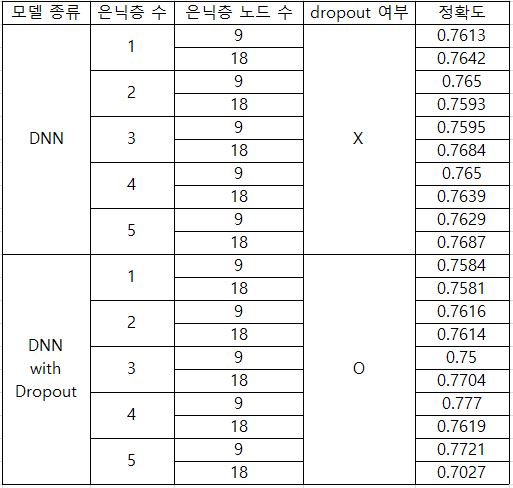
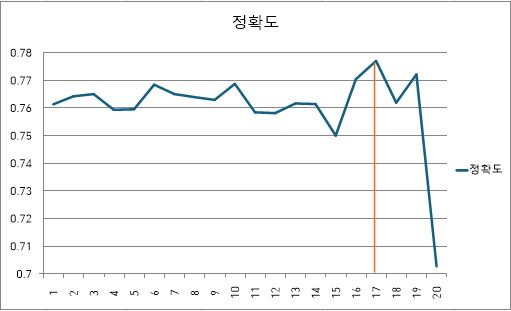

DNN 모델에 층마다 Dropout을 적용하고, 은닉층 수는 4개, 노드 수는 9개로 설정한 모델(mlp17)이 가장 뛰어난 성능을 보였습니다. (0.7770)

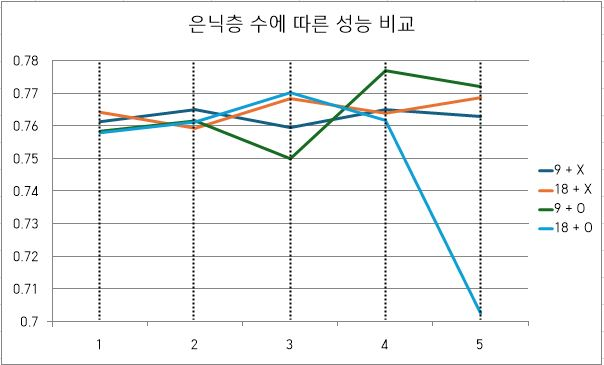

하나의 경우를 제외하면, 은닉층 수가 늘어날수록 성능이 좋아집니다.

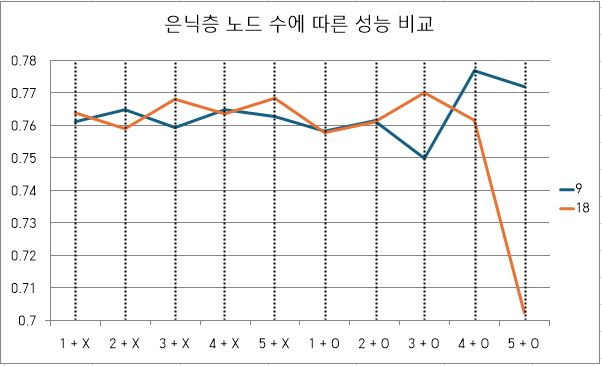

노드 수에 따라서는 비슷한 양상을 보여줍니다.

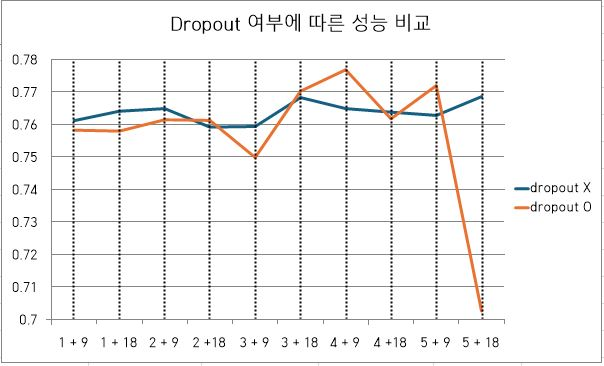

적절한 수의 은닉층 수와 Dropout 기법을 섞었을 때, 가장 좋은 성능이 나온 것으로 보아 Dropout 기법은 과적합을 피할 수 있을 뿐만 아니라 성능 향상에도 도움이 된다는 것을 알 수 있었습니다.